# Bruner Eduardo Augusto Albrecht

## Case - Data Engineering

Após a compra de um produto através do Olist, o vendedor recebe uma notificação para começar a processar o pedido e o cliente recebe uma estimativa de data de entrega. Possivelmente, nem todas as decisões da empresa foram acertadas no quesito de carteira de produtos e profitabilidade.

Apresente uma análise das vendas da empresa, baseando-se nos dados presentes no dataset, e a partir dela encontre soluções para melhorar os resultados da empresa. Tais sugestões podem ser na linha de **logística, marketing, vendas, produtos, entre outros**.

### Configurando o notebook e carregando os Dados

In [1]:
#Carregando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
print("Setup Complete")

Setup Complete


In [2]:
#carreagando os datasets para os dataframes 

#Informação geográfica sobre os vendedores
sellers = pd.read_csv('sellers_dataset.csv',index_col = 'seller_id', parse_dates=True)

#Informação geográfica sobre os clientes
customers = pd.read_csv('customers_dataset.csv',index_col = 'customer_unique_id', parse_dates=True)

#Pedidos de compra
orders = pd.read_csv('orders_dataset.csv',index_col = 'order_id', parse_dates=True)        

#Inclui os itens adquiridos em cada pedido de compra
items = pd.read_csv('order_items_dataset.csv', index_col = 'order_id', parse_dates=True)

#Métodos de pagamentos, valores e parcelas
payments = pd.read_csv('order_payments_dataset.csv', index_col = 'order_id', parse_dates=True)

In [3]:
#Verificando por possíveis valores nulos em vendedores
print(sellers.info())
sellers.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3095 entries, 3442f8959a84dea7ee197c632cb2df15 to 9e25199f6ef7e7c347120ff175652c3b
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_zip_code_prefix  3095 non-null   int64 
 1   seller_city             3095 non-null   object
 2   seller_state            3095 non-null   object
dtypes: int64(1), object(2)
memory usage: 96.7+ KB
None


,seller_zip_code_prefix,seller_city,seller_state
seller_id,,,
3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [5]:
#Verificando por possíveis valores nulos em compradores
print(customers.info())
customers.head()

<class 'pandas.core.frame.DataFrame'>
Index: 99441 entries, 861eff4711a542e4b93843c6dd7febb0 to 84732c5050c01db9b23e19ba39899398
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_zip_code_prefix  99441 non-null  int64 
 2   customer_city             99441 non-null  object
 3   customer_state            99441 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.8+ MB
None


,customer_id,customer_zip_code_prefix,customer_city,customer_state
customer_unique_id,,,,
861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP
290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP
060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP
259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP
345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP


In [6]:
#Verificando por possíveis valores nulos em pagamentos
print(payments.info())
payments.head()

<class 'pandas.core.frame.DataFrame'>
Index: 103886 entries, b81ef226f3fe1789b1e8b2acac839d17 to 28bbae6599b09d39ca406b747b6632b1
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   payment_sequential    103886 non-null  int64  
 1   payment_type          103886 non-null  object 
 2   payment_installments  103886 non-null  int64  
 3   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 4.0+ MB
None


,payment_sequential,payment_type,payment_installments,payment_value
order_id,,,,
b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
#Verificando por possíveis valores nulos em pedidos
print(orders.info())
orders.head()

<class 'pandas.core.frame.DataFrame'>
Index: 99441 entries, e481f51cbdc54678b7cc49136f2d6af7 to 66dea50a8b16d9b4dee7af250b4be1a5
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   customer_id                    99441 non-null  object
 1   order_status                   99441 non-null  object
 2   order_purchase_timestamp       99441 non-null  object
 3   order_approved_at              99281 non-null  object
 4   order_delivered_carrier_date   97658 non-null  object
 5   order_delivered_customer_date  96476 non-null  object
 6   order_estimated_delivery_date  99441 non-null  object
dtypes: object(7)
memory usage: 6.1+ MB
None


,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_id,,,,,,,
e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
#Verificando por possíveis valores nulos em items
print(items.info())
items.head()

<class 'pandas.core.frame.DataFrame'>
Index: 112650 entries, 00010242fe8c5a6d1ba2dd792cb16214 to fffe41c64501cc87c801fd61db3f6244
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_item_id        112650 non-null  int64  
 1   product_id           112650 non-null  object 
 2   seller_id            112650 non-null  object 
 3   shipping_limit_date  112650 non-null  object 
 4   price                112650 non-null  float64
 5   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 6.0+ MB
None


,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
order_id,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Análise para Vendas:

>**Vendas por Estado**

In [10]:
orders_by_state = pd.merge(left = customers, right = orders, on='customer_id', right_index=False)
orders_by_state

,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,3937,sao paulo,SP,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00
99437,e7b71a9017aa05c9a7fd292d714858e8,6764,taboao da serra,SP,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00
99438,5e28dfe12db7fb50a4b2f691faecea5e,60115,fortaleza,CE,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00
99439,56b18e2166679b8a959d72dd06da27f9,92120,canoas,RS,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00


customer_state
AC       81
AL      413
AM      148
AP       68
BA     3380
CE     1336
DF     2140
ES     2033
GO     2020
MA      747
MG    11635
MS      715
MT      907
PA      975
PB      536
PE     1652
PI      495
PR     5045
RJ    12852
RN      485
RO      253
RR       46
RS     5466
SC     3637
SE      350
SP    41746
TO      280
Name: customer_id, dtype: int64


<AxesSubplot:xlabel='customer_state'>

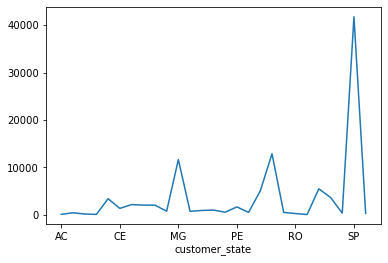

In [11]:
result = orders_by_state.groupby(['customer_state'])['customer_id'].count()
print(result)
result.plot()

>**vendas por dia/semana/mês no marketplace:**
> * Seria interesente quando montasse o dataframe ter conhecimento sobre cada um dos dados, pois assim poderiamos aplicar o dtype para adeguar os dados à sua melhor forma

In [12]:
orders["Day"] = orders["order_approved_at"].apply(lambda x: pd.Timestamp(x).day_name())
#orders["Day"] =  pd.to_datetime(orders["order_purchase_timestamp"]).dt.isocalendar().day #dias da semana em números,1->7
orders["Week"] = pd.to_datetime(orders["order_approved_at"]).dt.isocalendar().week 
orders["Month"] = orders["order_approved_at"].apply(lambda x: pd.Timestamp(x).month_name())

orders

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Day,Week,Month
order_id,,,,,,,,,,
e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,Monday,40,October
53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,Thursday,30,July
47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,Wednesday,32,August
949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,Saturday,46,November
ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,Tuesday,7,February
...,...,...,...,...,...,...,...,...,...,...
9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,Thursday,10,March
63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,Tuesday,6,February
83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,Sunday,34,August


Day
Friday       14659
Monday       13001
Saturday     12196
Sunday        9014
Thursday     15471
Tuesday      19154
Wednesday    15786
dtype: int64


<AxesSubplot:xlabel='Day'>

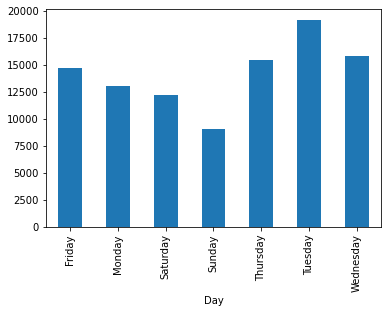

In [13]:
orders_by_day = orders.groupby(['Day']).size()
print(orders_by_day)
#necessita colocar título, ylabel, e organizar as labels pro x
orders_by_day.plot.bar()

Month
April         9152
August       10968
December      5833
February      8471
January       7947
July         10150
June          9416
March         9977
May          10759
November      7395
October       4910
September     4303
dtype: int64


<AxesSubplot:ylabel='Month'>

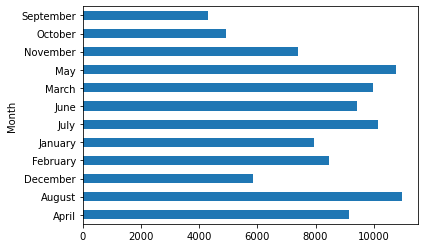

In [14]:
orders_by_month = orders.groupby(['Month']).size()
print(orders_by_month)
#necessita colocar título, ylabel, e organizar as labels pro x
orders_by_month.plot.barh()

<AxesSubplot:xlabel='Week'>

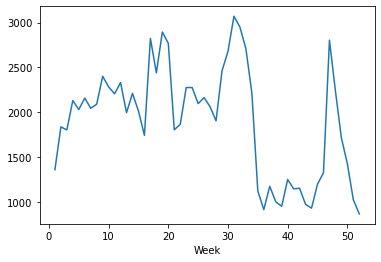

In [15]:
orders_by_week = orders.groupby(['Week']).size()
#print(orders_by_week)
#necessita colocar título e ylabel 
orders_by_week.plot()

>**Quais são as quantidades de produtos que cada vendedor vende?**

In [16]:
products_by_sellers = items.groupby(['seller_id', 'product_id']).size().reset_index()
products_by_sellers.sort_values(0, ascending=False)
products_by_sellers = products_by_sellers.rename(columns={'seller_id':'Seller_id','product_id':'Product_id',0:'Qntd'})
products_by_sellers

,Seller_id,Product_id,Qntd
0,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8,3
1,001cca7ae9ae17fb1caed9dfb1094831,08574b074924071f4e201e151b152b4e,113
2,001cca7ae9ae17fb1caed9dfb1094831,0da9ffd92214425d880de3f94e74ce39,17
3,001cca7ae9ae17fb1caed9dfb1094831,21fecd254a3103704126b28478ea7980,3
4,001cca7ae9ae17fb1caed9dfb1094831,4d7fee7877228c1497477ae53d97c214,2
...,...,...,...
34443,ffff564a4f9085cd26170f4732393726,cb17b798ba889575385281b7ec2fc22b,1
34444,ffff564a4f9085cd26170f4732393726,dbd024d4182504993ad1e3cd2ee9d9e9,2
34445,ffff564a4f9085cd26170f4732393726,de6517dda8e49774f58c07f80abc8d7a,1
34446,ffff564a4f9085cd26170f4732393726,e20b58fe57d487f33247e6cc1154eb9c,1


>**Taxa de conversão (%) = (Número de pedidos de uma dado vendendor / número de visitantes no site) x 100**
> * Levando em conta os números de pedidos já enviados( ou que o pagamentga já foi aceito)/ pelo núemro de customer_unique_id

In [126]:
items

,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
order_id,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95


In [89]:
#dar merge para uma nova tabela
number_of_clients= len(customers.index)
orders_by_sellers = items.groupby(['seller_id', 'order_id'])['order_id'].count().reset_index()
orders_by_sellers.sort_values(0, ascending=False)
orders_by_sellers = orders_by_sellers.rename(columns={'seller_id':'Seller_id','order_id':'Order_id',0:'Qntd'})
orders_by_sellers

KeyError: 'Column not found: order_id'

>**Qual método de compra se sobresai?** 

<AxesSubplot:xlabel='payment_type'>

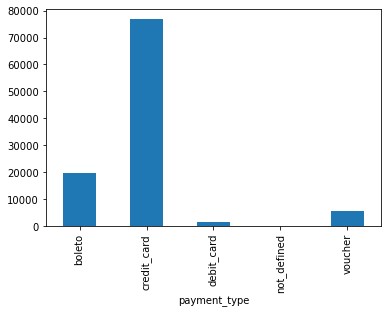

In [122]:
most_payments_methods =payments.groupby(['payment_type'])['payment_type'].count()

most_payments_methods.plot.bar()

### Análise para Produtos:

> **Quais produtos são mais comprados (Top 10 produtos mais comprados)**

In [42]:
top_items = items.groupby(['product_id']).size().reset_index()
top_items = top_items.set_index('product_id')
top_items = top_items.rename(columns={0:'Qntd'})
top_items = top_items.sort_values('Qntd', ascending=False)
top_items.head(10)
#top_items.head(10).plot.barh()

,Qntd
product_id,
aca2eb7d00ea1a7b8ebd4e68314663af,527
99a4788cb24856965c36a24e339b6058,488
422879e10f46682990de24d770e7f83d,484
389d119b48cf3043d311335e499d9c6b,392
368c6c730842d78016ad823897a372db,388
53759a2ecddad2bb87a079a1f1519f73,373
d1c427060a0f73f6b889a5c7c61f2ac4,343
53b36df67ebb7c41585e8d54d6772e08,323
154e7e31ebfa092203795c972e5804a6,281


> **Quantas vezes um produto foi parcelado**

In [100]:
#juntar tabela items(product_id) com a tabela payments(payment_installments) em order_id
most_products_installments = pd.merge(left=items, right= payments, on='order_id')
products_by_installments = most_products_installments.groupby(['product_id','payment_installments'])['payment_installments'].size()
products_by_installments = products_by_installments.sort_values(0, ascending=False)
products_by_installments = pd.DataFrame(data=products_by_installments)
products_by_installments = products_by_installments.rename(columns={"payment_installments":'Quantities of Products Installments'})
products_by_installments

,,Quantities of Products Installments
product_id,payment_installments,
aca2eb7d00ea1a7b8ebd4e68314663af,1,341
422879e10f46682990de24d770e7f83d,1,303
389d119b48cf3043d311335e499d9c6b,1,224
368c6c730842d78016ad823897a372db,1,217
53759a2ecddad2bb87a079a1f1519f73,1,207
...,...,...
99e71b776debf2f01a69dce207e3e4f8,2,1
99e6f14f74a00605ad9cfe8c4bb29385,18,1
99e60b5a73c761f67099763a17c13bed,1,1


>**ticket médio = Soma do faturamento em vendas (R$)/Nº de vendas concluídas**

### Análise para Logística:

>Maior valor de frete encontrado por estado

<AxesSubplot:xlabel='customer_state'>

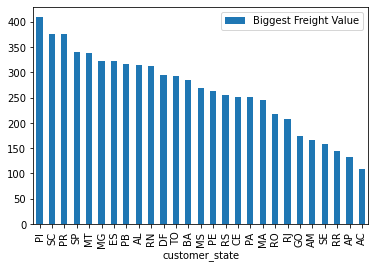

In [121]:
aux = pd.merge(left=items, right=orders, on= 'order_id') #customers(ligando pelo customer_id e pegando os valores de estado e cidade)
# items(order_id e pegando freight_value) #orders(ligando por order_id e pegando o customer_id)
biggest_freight_value = pd.merge(left=customers, right=aux, on='customer_id')
freight_value_by_state = biggest_freight_value.groupby(['customer_state'])['freight_value'].max()
freight_value_by_state = freight_value_by_state.sort_values(0, ascending=False)
freight_value_by_state = pd.DataFrame(data=freight_value_by_state)
freight_value_by_state = freight_value_by_state.rename(columns={'freight_value':'Biggest Freight Value'})
freight_value_by_state.plot.bar()

<AxesSubplot:>

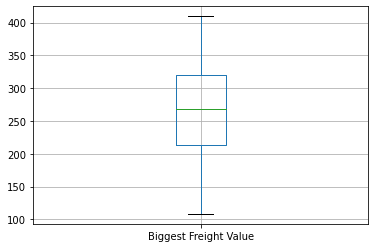

In [119]:
freight_value_by_state.boxplot()